## FB-Prophet 

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 

## Load Libraries

In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt



#### Load Data

In [2]:
df = pd.read_csv('../Data/Miles_Traveled.csv')
df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
#Format the data
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


#### Train and Test Split

In [5]:
train = df.iloc[:576]
test = df.iloc[576:]

In [6]:
# This is fitting on all the data 
m = Prophet()
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
#Create future placeholder dataframe 
future = m.make_future_dataframe(periods=12,freq = 'MS')

In [8]:
#24 periods added to future dataframe
future.shape

(588, 1)

In [9]:
df.shape

(588, 2)

In [10]:
#predicting the future data
forecast = m.predict(future)

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,94369.204206,70034.744495,81564.114965,94369.204206,94369.204206,-18590.711409,-18590.711409,-18590.711409,-18590.711409,-18590.711409,-18590.711409,0.0,0.0,0.0,75778.492797
1,1970-02-01,94677.118260,61462.254489,73377.888339,94677.118260,94677.118260,-27101.992246,-27101.992246,-27101.992246,-27101.992246,-27101.992246,-27101.992246,0.0,0.0,0.0,67575.126014
2,1970-03-01,94955.234179,89140.802156,100895.017445,94955.234179,94955.234179,-28.009970,-28.009970,-28.009970,-28.009970,-28.009970,-28.009970,0.0,0.0,0.0,94927.224209
3,1970-04-01,95263.148233,89645.889904,101170.289290,95263.148233,95263.148233,33.016772,33.016772,33.016772,33.016772,33.016772,33.016772,0.0,0.0,0.0,95296.165004
4,1970-05-01,95561.129575,99688.751148,110716.066603,95561.129575,95561.129575,9620.044081,9620.044081,9620.044081,9620.044081,9620.044081,9620.044081,0.0,0.0,0.0,105181.173656


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1970-01-01,75778.492797,70034.744495,81564.114965
1,1970-02-01,67575.126014,61462.254489,73377.888339
2,1970-03-01,94927.224209,89140.802156,100895.017445
3,1970-04-01,95296.165004,89645.889904,101170.289290
4,1970-05-01,105181.173656,99688.751148,110716.066603
...,...,...,...,...
583,2018-08-01,279781.251998,274071.273932,285973.990000
584,2018-09-01,261804.058951,255823.472036,268032.323781
585,2018-10-01,268916.474916,263068.085169,274218.461560
586,2018-11-01,255542.607617,250238.551125,260938.922136


#### Plotting Forecast

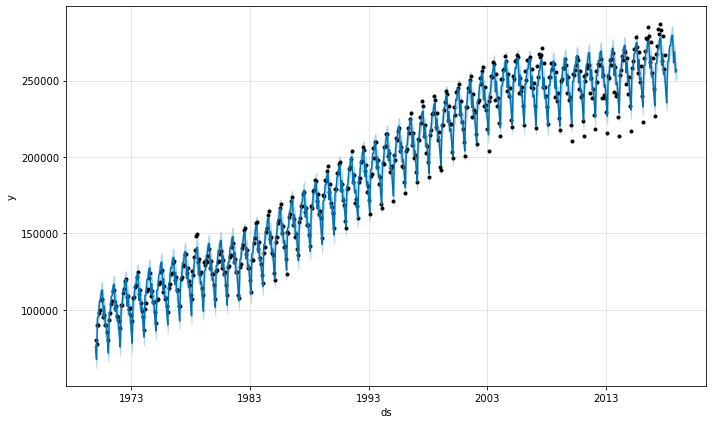

In [13]:
m.plot(forecast);

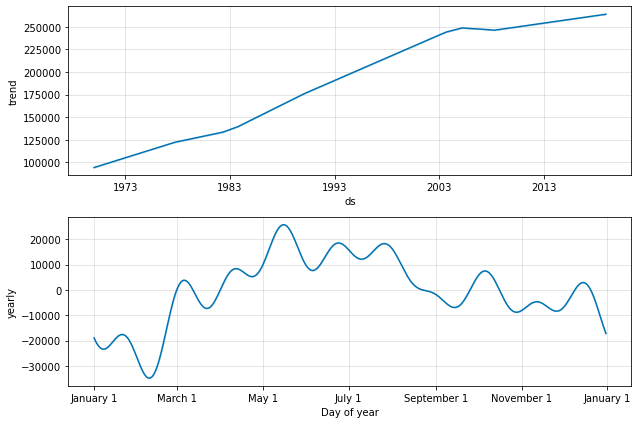

In [14]:
m.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

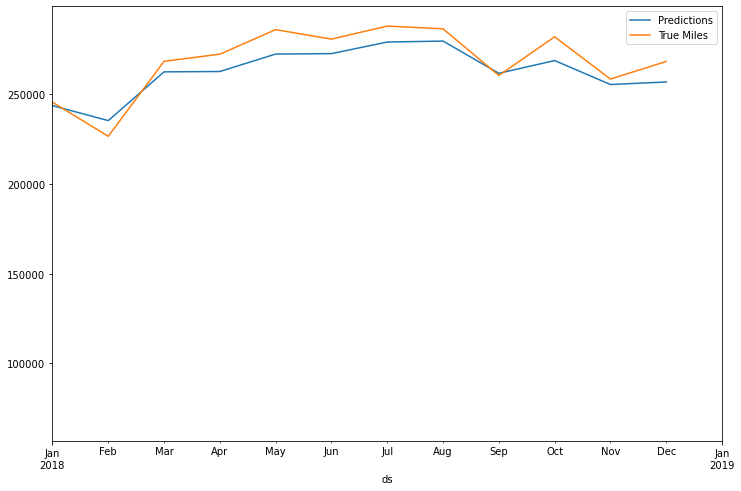

In [15]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

## Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [16]:
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [17]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [18]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:prophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [19]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.087674,107050.052775,109919.684271,102445.0,1976-12-11
1,1977-02-01,102996.111722,101639.428424,104364.120479,102416.0,1976-12-11
2,1977-03-01,118973.318539,117596.285426,120492.658541,119960.0,1976-12-11
3,1977-04-01,120612.924126,119204.982580,122166.284071,121513.0,1976-12-11
4,1977-05-01,127883.032250,126368.143251,129424.488880,128884.0,1976-12-11


In [20]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.405780e+07,4904.874956,4508.576841,0.027641,0.023401,0.027224,0.4
1,53 days,2.154158e+07,4641.290787,4240.548939,0.024871,0.023401,0.024574,0.4
2,54 days,1.811659e+07,4256.358815,3715.480456,0.019975,0.022126,0.019817,0.5
3,55 days,2.292300e+07,4787.797490,4231.785972,0.023010,0.023401,0.022763,0.4
4,57 days,2.079789e+07,4560.470470,3973.876022,0.021322,0.022126,0.021115,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.822290e+07,4268.829242,3743.237614,0.019547,0.019551,0.019555,0.5
95,361 days,1.734359e+07,4164.564050,3471.144391,0.018186,0.018853,0.018204,0.5
96,362 days,3.172965e+07,5632.907384,4402.292136,0.022008,0.024576,0.021906,0.4
97,364 days,2.988951e+07,5467.129631,4229.675527,0.021360,0.021556,0.021271,0.5


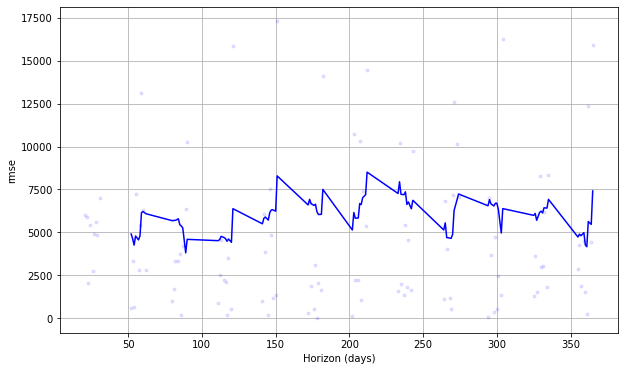

In [21]:
plot_cross_validation_metric(df_cv, metric='rmse');

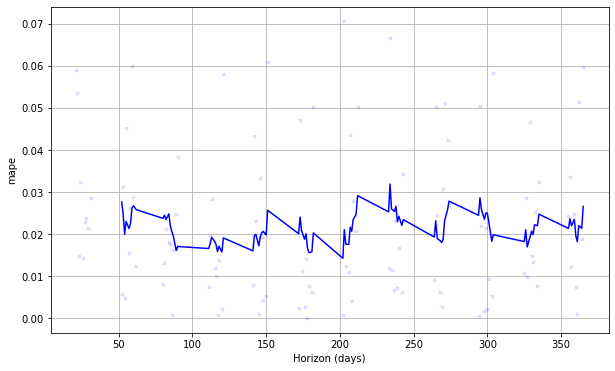

In [22]:
plot_cross_validation_metric(df_cv, metric='mape');

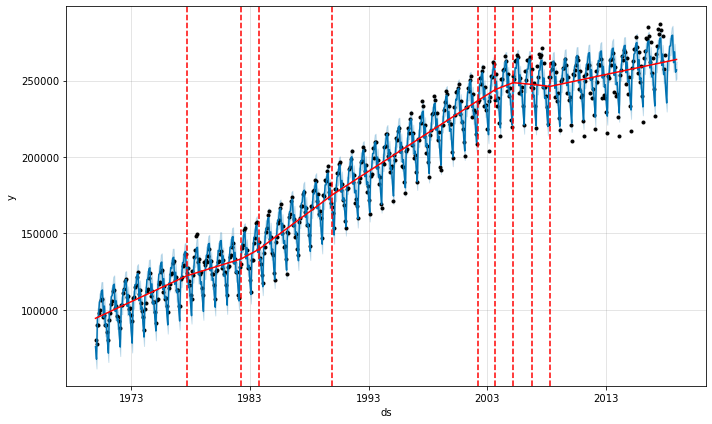

In [23]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


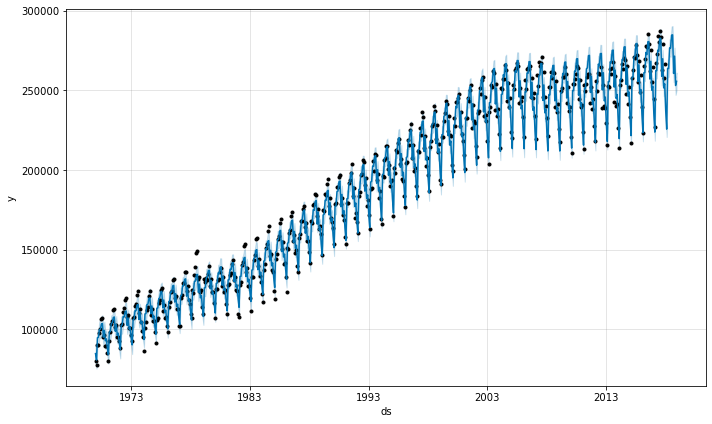

In [24]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(train)
forecast = m.predict(future)
fig = m.plot(forecast)

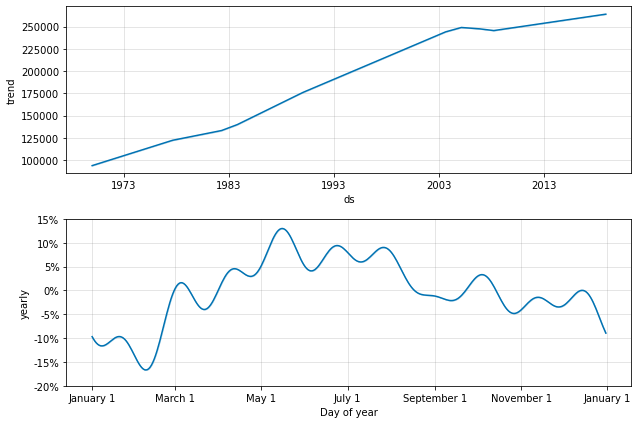

In [25]:
fig = m.plot_components(forecast)

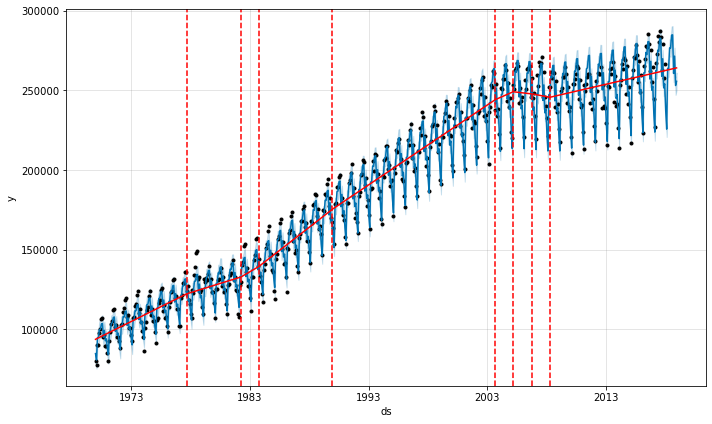

In [26]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)